In [8]:
import papermill as pm
from datetime import datetime, timedelta
import os
import scrapbook as sb
import pandas as pd
import sqlite3

In [3]:
base_output_folder = os.path.expanduser('outputs')

if not os.path.exists(base_output_folder):
        os.makedirs(base_output_folder)

In [4]:
def last_dow(d: datetime, dow: int) -> datetime:
    '''
    Gets the date of the last day of week, using datetime convention of Monday is 0 and Sunday is 6
    '''
    dow_d = d.weekday()
    days_delta = (7 - dow) + dow_d if dow_d < dow else dow_d - dow
    return d - timedelta(days=days_delta)

#### Retrieve last available date

In [21]:
conn = sqlite3.connect('data.db')
# create a cursor object from the connection to use for querying:
cur = conn.cursor()
cur.execute("SELECT ts FROM ohlc")
data = cur.fetchall()
df = pd.DataFrame(
    data,
    columns=['ts']
)
df.sort_values('ts')['ts'].values[-1:]

array(['2021-12-15 00:00:00'], dtype=object)

In [26]:
end_dates = [(last_dow(datetime(2021, 12, 15), 4) - timedelta(days=7 * x)) for x in range(1)]

tokens = ['BTC', 'ETH', 'USDT', 'SOL', 'ADA', 'DOT', 'AVAX', 'ATOM', 'CRV','AAVE', 'COMP']

In [32]:
for end_date in end_dates:
    for token in tokens:
        print(f'running for {token} for date {end_date - timedelta(days=14)} to {end_date}', end='\r')
        res = pm.execute_notebook(
            'template.ipynb',
            f'{base_output_folder}/market_analysis_{token}_{str(end_date - timedelta(days=14))[:10]}.ipynb',
            parameters = {
                'from_date': f'{end_date - timedelta(days=14)}',
                'to_date': f'{end_date}',
                'chosen_token': token,
            }
        )

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

In [33]:
nbs = sb.read_notebooks('outputs')

In [34]:
pd.DataFrame([
    pd.Series({
        'token': scrap['token'].data,
        'from_date': scrap['from_date'].data,
        'to_date': scrap['to_date'].data,
        'volatility': scrap['prices'].data.volatility.mean()}) 
    for book, scrap in nbs.notebook_scraps.items()
])

,token,from_date,to_date,volatility
0,AAVE,2021-11-26 00:00:00,2021-12-10 00:00:00,0.214641
1,ADA,2021-11-26 00:00:00,2021-12-10 00:00:00,0.215387
2,ATOM,2021-11-26 00:00:00,2021-12-10 00:00:00,0.300177
3,AVAX,2021-11-26 00:00:00,2021-12-10 00:00:00,0.306208
4,BTC,2021-11-26 00:00:00,2021-12-10 00:00:00,0.152079
5,COMP,2021-11-26 00:00:00,2021-12-10 00:00:00,0.227793
6,CRV,2021-11-26 00:00:00,2021-12-10 00:00:00,0.356830
7,DOT,2021-11-26 00:00:00,2021-12-10 00:00:00,0.248786
8,ETH,2021-11-26 00:00:00,2021-12-10 00:00:00,0.175309
9,SOL,2021-11-26 00:00:00,2021-12-10 00:00:00,0.248846


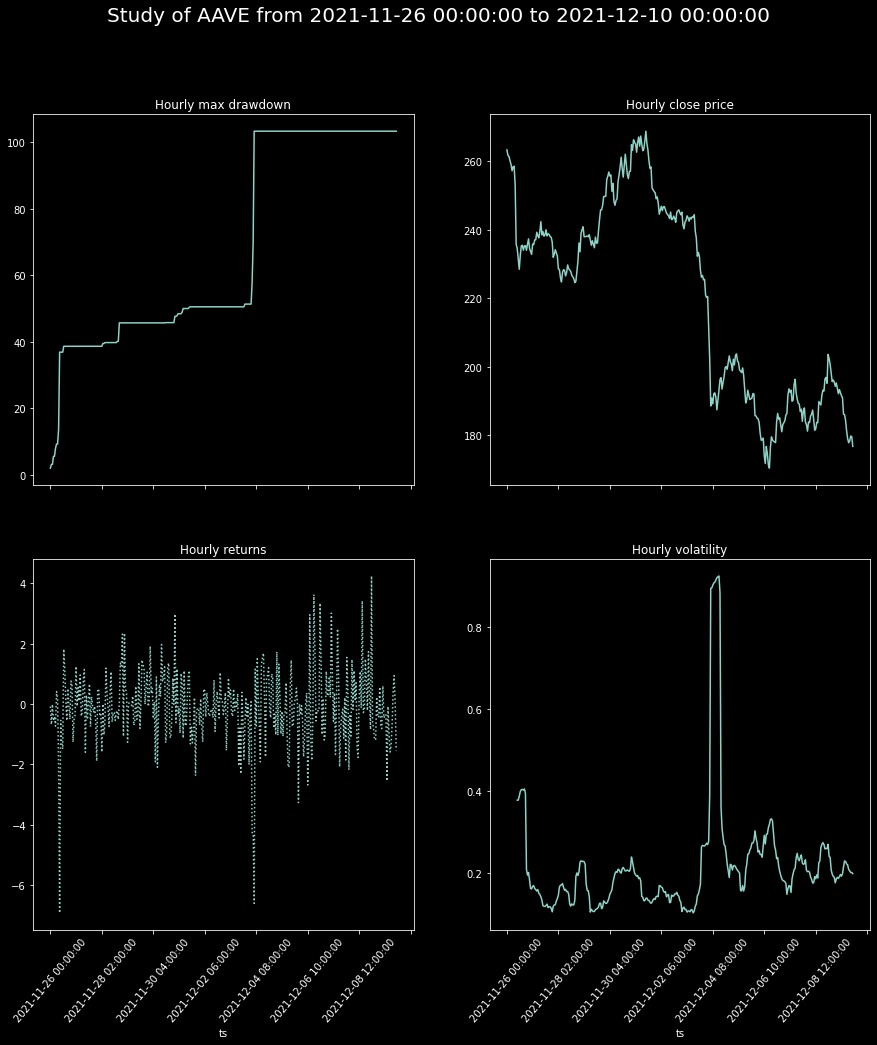

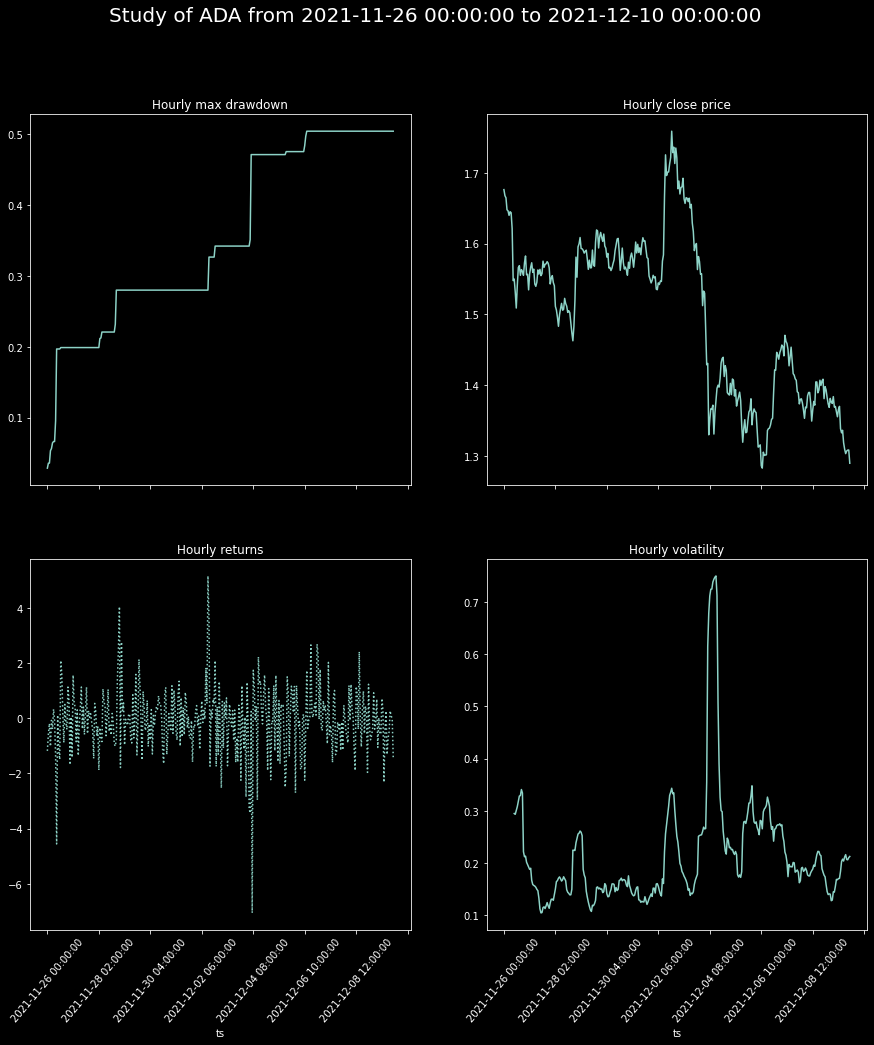

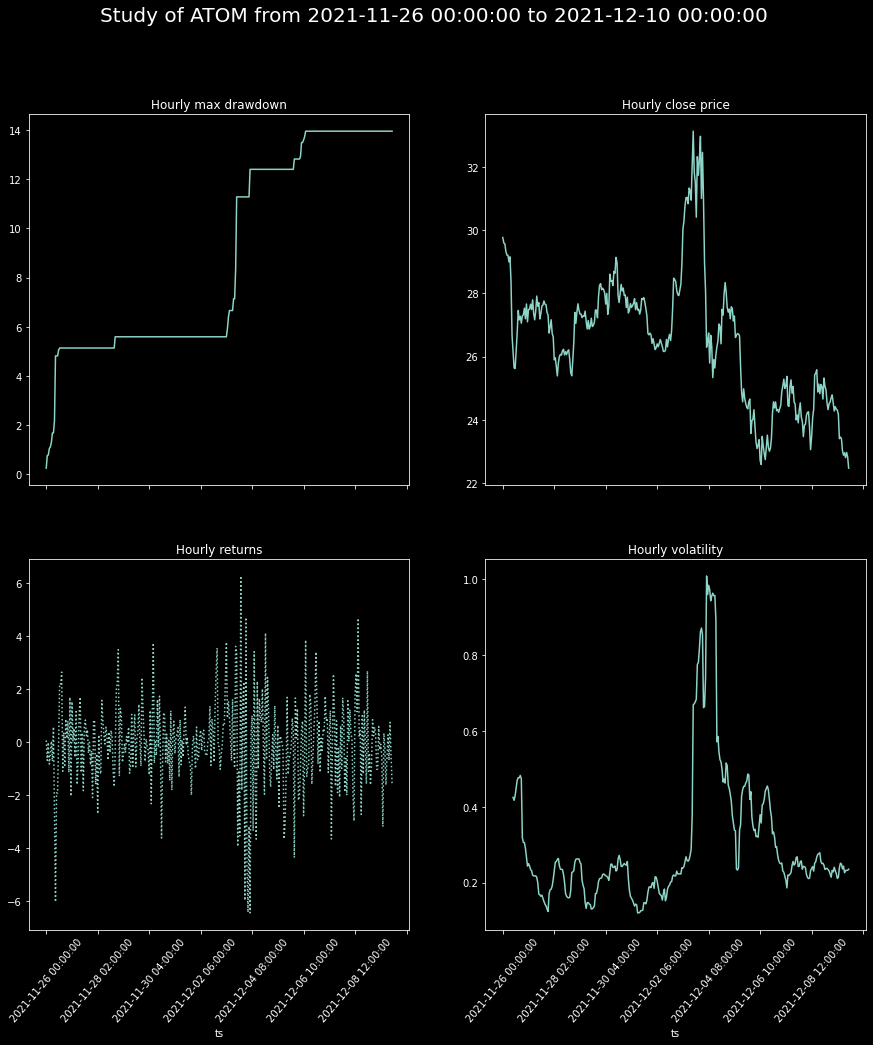

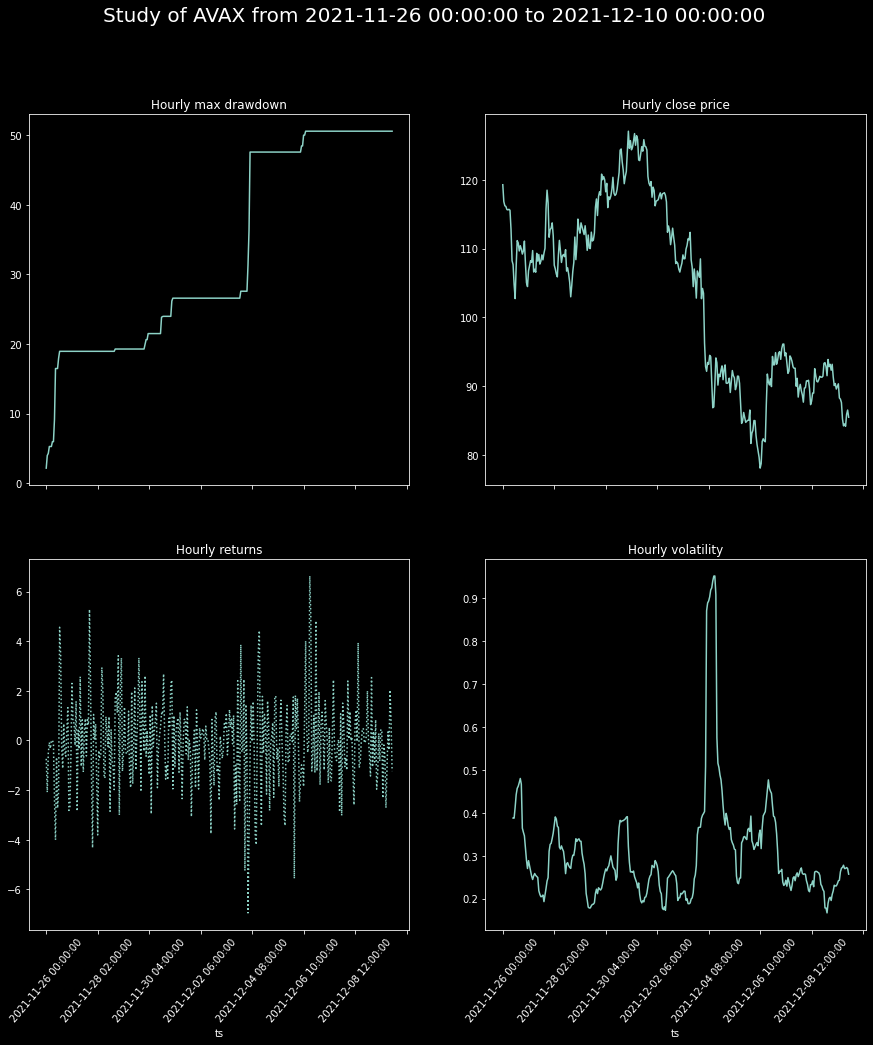

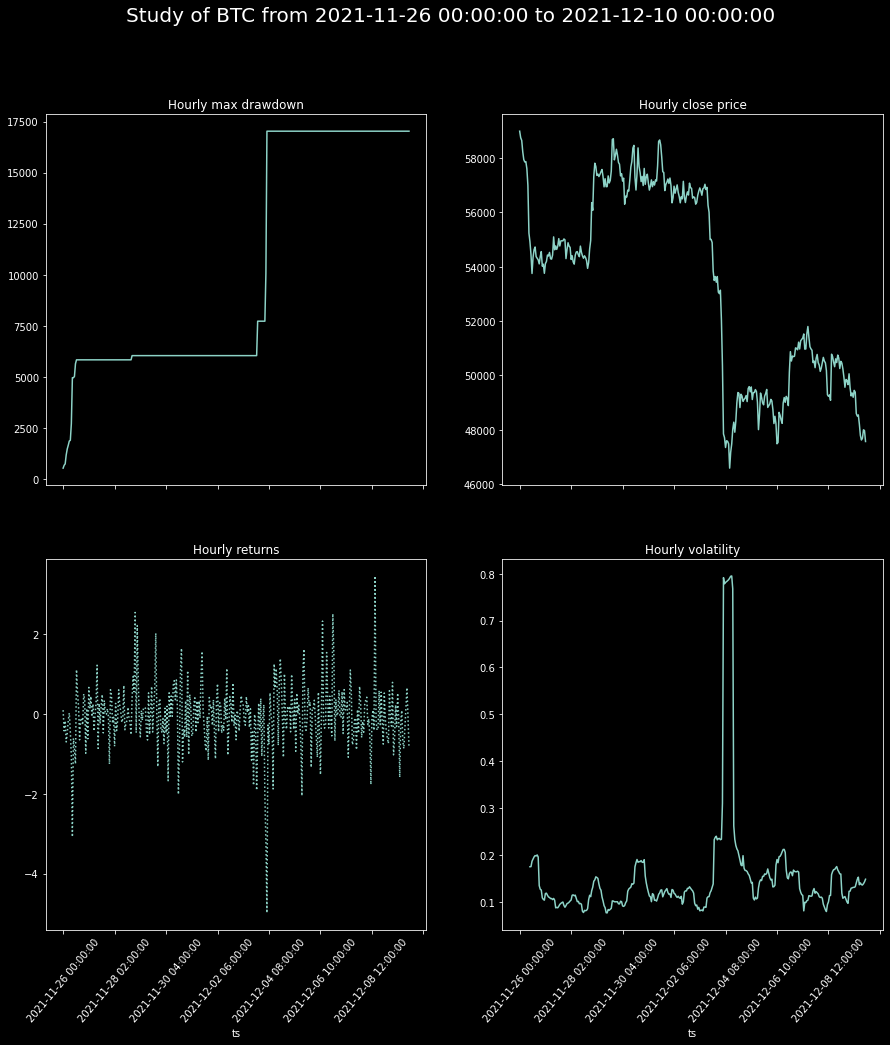

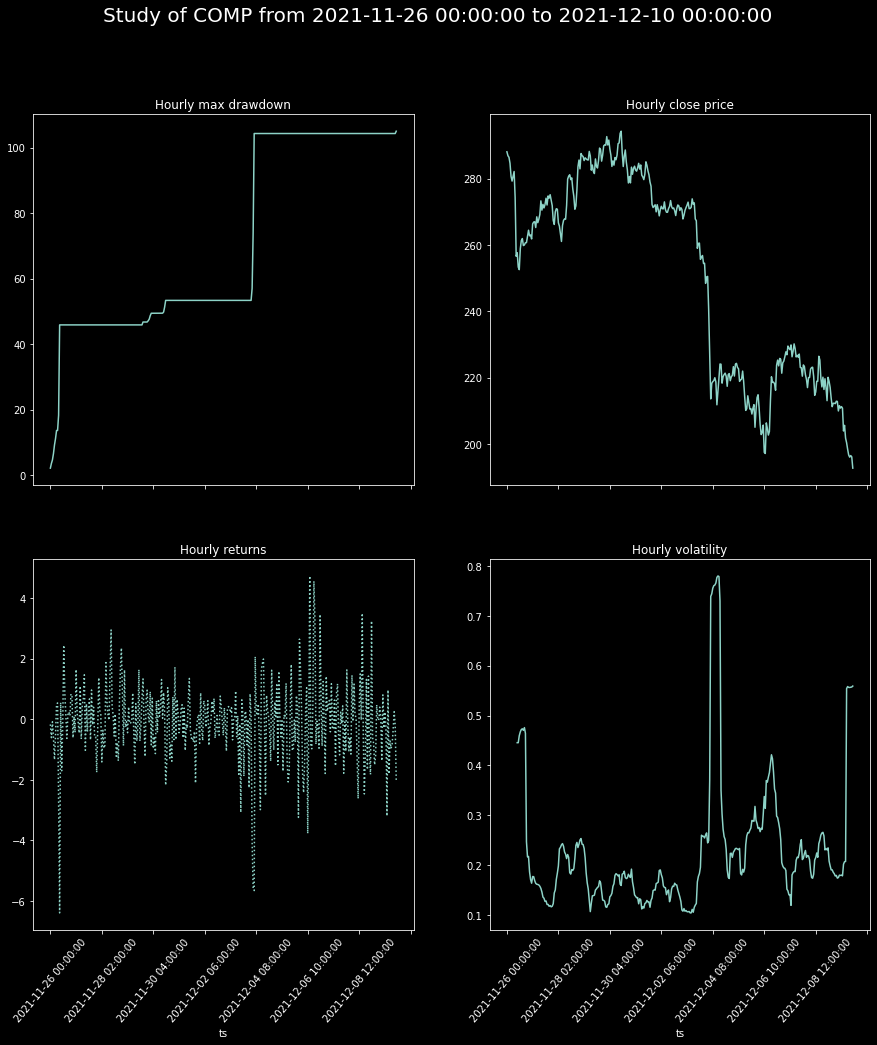

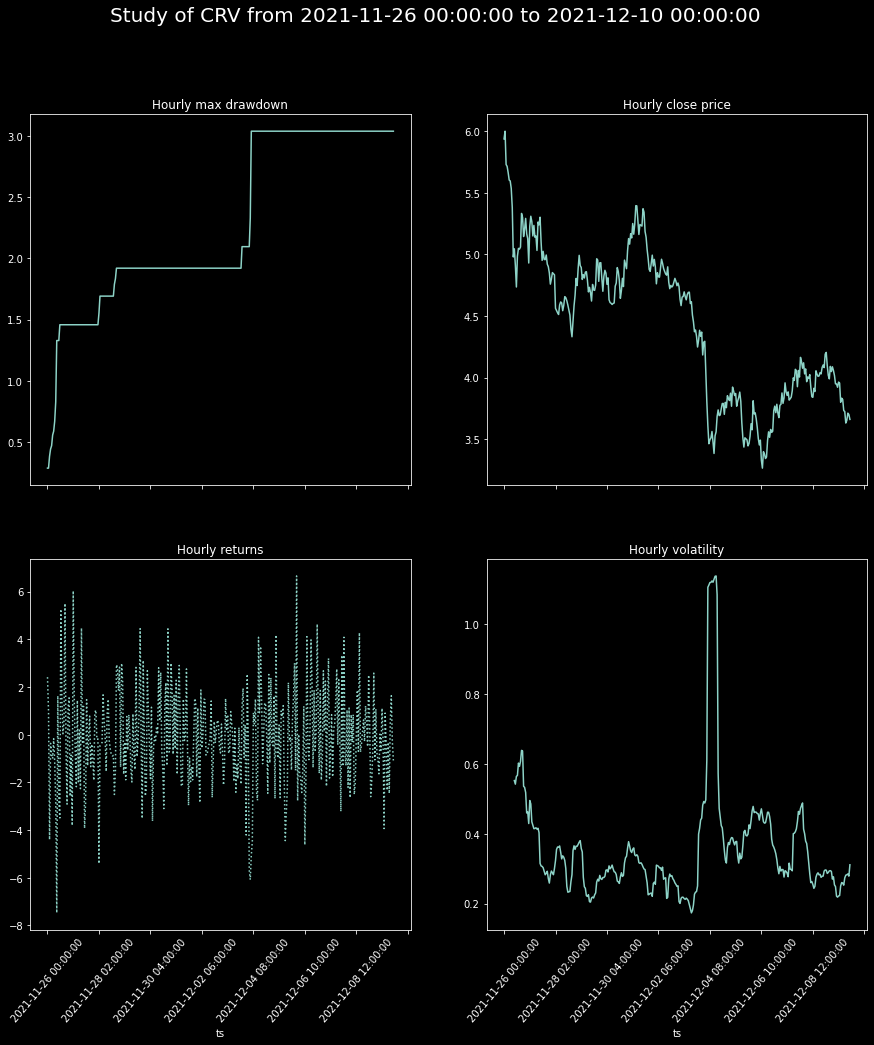

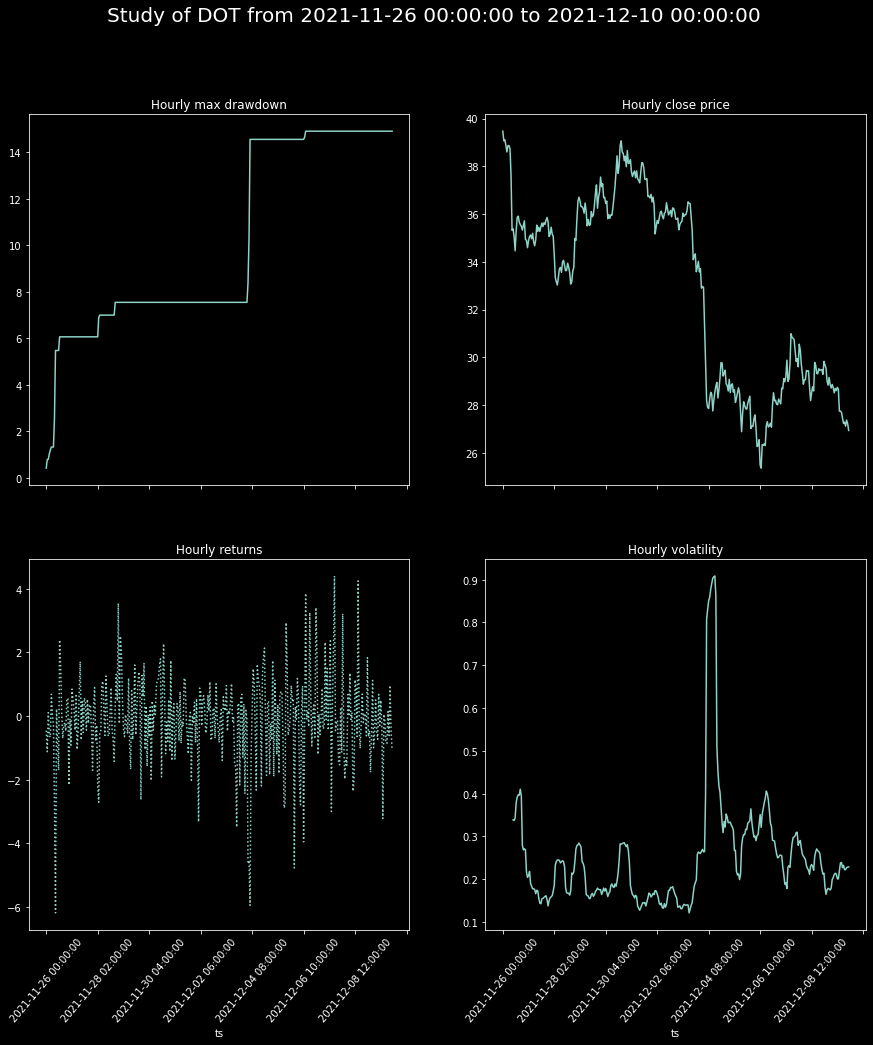

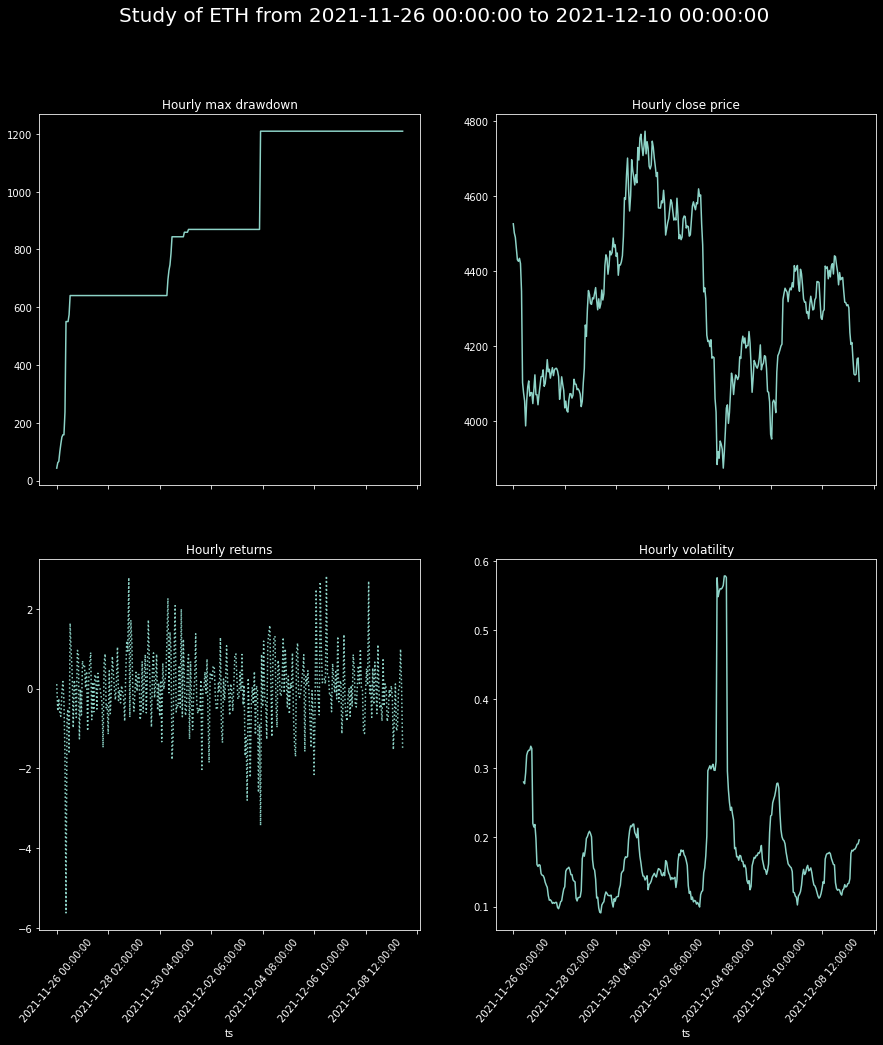

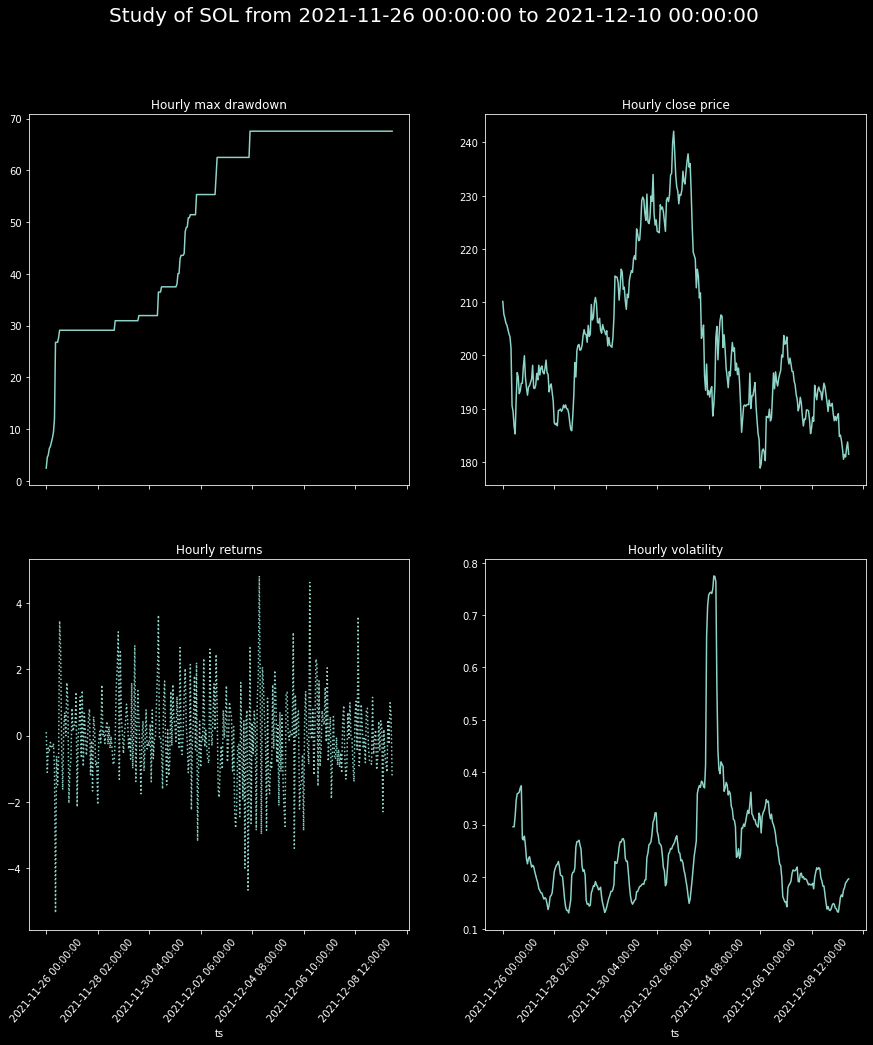

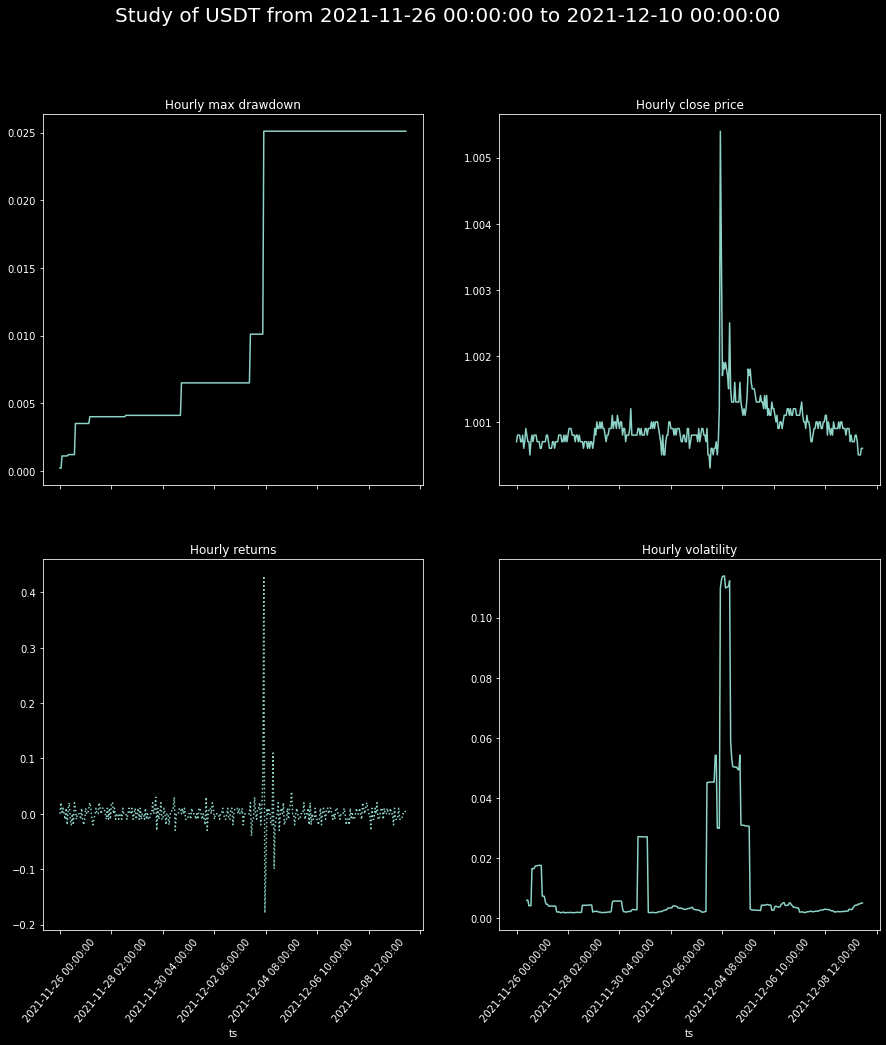

[None, None, None, None, None, None, None, None, None, None, None]

In [35]:
[nbs[nb_name].reglue('summary_plot') for nb_name in nbs]